# Networks basics and methods

Most of the motivation for research on networks comes from mathematics and social sciences. As with any method applied to a new field, this should be kept in mind during formulating an analysis. 

For this exercise, we simply load all methods available from igraph. Usualy it makes more sense to only load needed methods, since otherwise we do not know where e.g. the `plot()` comes from.

In [1]:
from igraph import *
import pandas as pd

Initiate a graph object

In [2]:
g = Graph()

The graph is empty 

In [3]:
print(g)

IGRAPH U--- 0 0 --


Add vertices (nodes), these could for example be texts by Tucholsky. Vertices are numbered starting from 0.

In [4]:
g.add_vertices(6)

In [5]:
print(g)

IGRAPH U--- 6 0 --


Edges (links) between vertices are added as pairs of integers, e.g. between the zeroth and first vertex `(0,1)`.

In [6]:
g.add_edges([(0,1), (1,2),(2, 3), (3, 4), (4, 5), (5, 3)])

In [7]:
print(g)

IGRAPH U--- 6 6 --
+ edges:
0--1 1--2 2--3 3--4 4--5 3--5


If you try to add an edge to a node that does not exist you ll get an error.

In [8]:
g.add_edges([(10,1)])

InternalError: Error at src/graph/type_indexededgelist.c:270: cannot add edges. -- Invalid vertex id

Similar to vertices, edges are also internaly numbers starting from zero. To delete an edge in a controlled fashion, you first need to obtain its id.

In [9]:
g.get_eid(0,1)

0

And then delete it

In [10]:
g.delete_edges(0)

In [11]:
summary(g)

IGRAPH U--- 6 5 -- 


## Generators for graphs

### Trees

An undirected graph where all vertices are connected by only one path.

In [12]:
g_tree = Graph.Tree(100,2)

In [13]:
summary(g_tree)

IGRAPH U--- 100 99 -- 


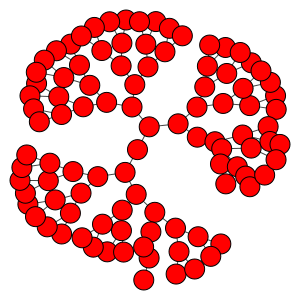

In [14]:
plot(g_tree, bbox = (300, 300), margin = 20)

### Erdos Renyi 

Generate a random graph. Set N vertices and a probability for an edge p and create edges randomly. 

In [15]:
g_erdos = Graph.Erdos_Renyi(100,0.1)

In [16]:
summary(g_erdos)

IGRAPH U--- 100 481 -- 


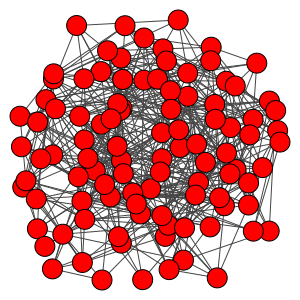

In [17]:
plot(g_erdos, bbox = (300, 300), margin = 20)

### Barabasi-Albert

Generate a graph based on _preferential attachment_[1]. This model is popular for generating graphs where the deree distribution follows a power law. It is believed that many empirical networks follow this degree distribution.

The construction is random, however, nodes with more connections tend to get even more connections (_the rich get richer_). This leads to hub structures in networks, where few nodes have a large number of connections. It also allows to define the core and periphery of networks (_who is in, who is out_). 

Note, that there are also many refuted claims, see e.g. [2].

> - [1] Barabasi, A-L and Albert, R. 1999. Emergence of scaling in random networks. Science, 286 509-512
> - [2] Broido, A.D. and Clauset, A. 2019. Scale-free networks are rare. [Nat Commun. 10 1017](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6399239/)


In [18]:
g_barabasi = Graph.Barabasi(100,3)

In [19]:
summary(g_barabasi)

IGRAPH U--- 100 294 -- 


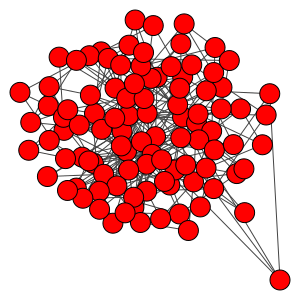

In [20]:
plot(g_barabasi, bbox = (300, 300), margin = 20)

# Structure of graphs

Apart from simply counting the number of vertices and edges there is a range of methods to structurally asses a network. For a simple overview, see e.g. [1]

> [1] Grandjean, M. and Jacomy, M. 2019. Translating Networks: Assessing Correspondence Between Network Visualisation and Analytics [source](https://halshs.archives-ouvertes.fr/halshs-02179024)

## Degree 

The degree of a vertex describes the number of edges attached to it. For directed graphs, we can look at in- and out-degree. This is for example the basis of a _disruption analysis_ how the size of teams influences innovation [1].

> [1]: Wu, L. , Wang. D. and Evans, J.A. 2019. Large teams develop and small teams disrupt science and technology. [Nature 566 378](https://www.nature.com/articles/s41586-019-0941-9)

In [21]:
g_tree.degree()[:10]

[2, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [22]:
g_erdos.degree()[:10]

[6, 8, 15, 10, 9, 8, 8, 8, 11, 9]

### Compare degree distributions

- Calculate the degree distribution for tree, barabasi and erdos graphs
- Use the given templates and change the variable and column names to set new variables
- Merging two dataframes can happen based on the index
  - first create an intermediate dataframe, then merge the third df to that
- Plot the resulting dataframe
  - Explain the different distributions based on the introduction of the graph types above

In [23]:
h_b = g_barabasi.degree_distribution()

In [24]:
dfErdos = pd.DataFrame([[x[0],x[2]] for x in h_e.bins()]).rename(columns={0:'bin',1:'erdos'}).set_index('bin')

NameError: name 'h_e' is not defined

In [25]:
dfM1 = pd.merge(dfErdos,DF2, left_index=True, right_index=True, how='outer')

NameError: name 'dfErdos' is not defined

In [ ]:
dfMerged = pd.merge(dfM1, DF§, left_index=True, right_index=True, how='outer')

In [ ]:
dfMerged.plot()

## Closeness Centrality

What is the average length of the shortest path between a vertex and all other vertices. Only well defined for connected graphs.

In [ ]:
g_tree.closeness()[:10]

## Betweenness centrality

Describes the role of each vertex for connecting other vertices. Vertices with a high betweenness centrality have a high probability to occure on a random shortest path between two random vertices. 

In [26]:
g_barabasi.vs.betweenness()[:10]

[411.4935335190229,
 369.4591316519138,
 654.4264477046038,
 989.3289875187032,
 201.28832582734114,
 932.2360577043546,
 224.0053612254245,
 172.37185596742734,
 18.80806595365419,
 45.642584560934964]

### Plot nodes colored by betweenness

- Setting the colors of nodes can give a better overview of a network
- Calculate the maximum betweenness, using `max(LIST)` on the list of betweenness values
- Set colors of nodes by adding the value `graph.vs['color']` for every vertex
  - This can be done by giving a list of color values with the same length as the vertices ( a list can be constructed like `[x for x in values]`)
  - Colors are obtained by `reds(number)` but the number has to be normalized (0,1), use maximal value to achive this
  

In [27]:
from matplotlib import cm
reds = cm.get_cmap('Reds', 12)
print(reds)

In [28]:
maximum = max(LIST_OF_BETWEENNEESS)

NameError: name 'LIST_OF_BETWEENNEESS' is not defined

In [ ]:
g_barabasi.vs['color'] = LIST

In [ ]:
plot(g_barabasi, bbox = (300, 300), margin = 20)

## Eigenvector centrality

Measures the influence of a vertex in a network. Important algorithms like Googles pagerank are based on this.

In [29]:
g_tree.evcent()[:10]

[0.6360892114993518,
 1.0,
 0.6523469597378098,
 0.9807881128897371,
 0.980788112889736,
 0.543762999395795,
 0.5147269395296844,
 0.7738796910737976,
 0.7738796910737978,
 0.7738796910737973]

## Comparing graphs

Using the eigenvalues of the graphs, we can compare the spectra of graphs. This is the basis of many comparisions of real, empirical graphs. Comparing a know graph tp known model graphs gives insights on the possible rules behind the creation of the graph. E.g. preferential attachment vs random links.

- Create a dictionary of sorted eigenvalues for the three graphs 
  - `dictGraphs = {name: values, name2: values2}`
  - Create a dataframe out of the dictionary `df = pd.DataFrame(dictGraphs)`
  - Plot the spectra
- What can you observe, taking in mind the introduction of the graphs above?

These methods can be computationally hard for large networks, or even impossible. There are methods for coarse graining large graphs, that preserve the structural properties of the graphs, which yield computational feasible graphs. 
> Gfeller, D. and De Los Rios, P. 2007. Spectral Coarse Graining of Complex Networks, PRL 99, 038701 [source](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.038701)